In [1]:
import pandas as pd
from plotnine import *
import os
import functools
import re
import seaborn as sns


In [150]:
path = "/space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/bulkSimulations/data/EGAD/pbmc_sc_with_metadata_cpm_pc.h5ad/numbsimulations125"

In [151]:
sample_size_dirs = os.listdir(path)
sample_size_dirs

['ss100',
 'ss1500',
 'ss900',
 'ss300',
 'ss200',
 'ss800',
 'ss600',
 'ss700',
 'ss3000',
 'ss2000',
 'ss500',
 'ss400',
 'ss1000']

In [152]:
lopaths = [f"{path}/{ssdir}" for ssdir in sample_size_dirs]
lopaths

['/space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/bulkSimulations/data/EGAD/pbmc_sc_with_metadata_cpm_pc.h5ad/numbsimulations125/ss100',
 '/space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/bulkSimulations/data/EGAD/pbmc_sc_with_metadata_cpm_pc.h5ad/numbsimulations125/ss1500',
 '/space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/bulkSimulations/data/EGAD/pbmc_sc_with_metadata_cpm_pc.h5ad/numbsimulations125/ss900',
 '/space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/bulkSimulations/data/EGAD/pbmc_sc_with_metadata_cpm_pc.h5ad/numbsimulations125/ss300',
 '/space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/bulkSimulations/data/EGAD/pbmc_sc_with_metadata_cpm_pc.h5ad/numbsimulations125/ss200',
 '/space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/bulkSimulations/data/EGAD/pbmc_sc_with_metadata_cpm_pc.h5ad/numbsimulations125/ss800',
 '/space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/bulkSimulations/data/EGAD/pbmc_sc_with_meta

In [166]:

var = "var0_"
def getVar0(path, var):
    # Use os.listdir() to get a list of all files in the directory
    files = os.listdir(path) 
    
    # Use a list comprehension to filter files containing "var0" in their names
    filtered_files = [file for file in files if var in file]
    if filtered_files:
        file = filtered_files[0]
        return f"{path}/{file}"

In [154]:
lopaths_final = [getVar0(path) for path in lopaths]

# Remove all occurrences of None using list comprehension
lopaths_final = [x for x in lopaths_final if x is not None]


In [155]:
lodfs = [pd.read_csv(path, sep = ",", index_col=0) for path in lopaths_final]
print(len(lodfs))
print(lodfs[0])




13
                 auc  avg_node_degree  degree_null_auc
GO:0002250  0.514064         3.047073         0.511425
GO:0007166  0.489170         6.504961         0.495805
GO:0045087  0.504204         9.452936         0.509302
GO:0009617  0.468718         5.602387         0.521489
GO:0006955  0.486660         5.065555         0.502289
...              ...              ...              ...
GO:0051697  0.486060       -11.382914         0.608151
GO:0000768  0.489514        -0.159590         0.451780
GO:0036444  0.475073         4.231915         0.406864
GO:1990108  0.244192        19.183164         0.439426
GO:0097039  0.953448         1.282449         0.045080

[2360 rows x 3 columns]


In [156]:
# Get the first column (auc) for each df
lodfs = [df.iloc[:,0] for df in lodfs]
lodfs[0]



GO:0002250    0.514064
GO:0007166    0.489170
GO:0045087    0.504204
GO:0009617    0.468718
GO:0006955    0.486660
                ...   
GO:0051697    0.486060
GO:0000768    0.489514
GO:0036444    0.475073
GO:1990108    0.244192
GO:0097039    0.953448
Name: auc, Length: 2360, dtype: float64

In [158]:
# Add a name to each series
lonamed_dfs = []
for i, df in enumerate(lodfs):
    df.name = lopaths[i]
    lonamed_dfs.append(df)
    
len(lonamed_dfs)
print(lonamed_dfs[0])

GO:0002250    0.514064
GO:0007166    0.489170
GO:0045087    0.504204
GO:0009617    0.468718
GO:0006955    0.486660
                ...   
GO:0051697    0.486060
GO:0000768    0.489514
GO:0036444    0.475073
GO:1990108    0.244192
GO:0097039    0.953448
Name: /space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/bulkSimulations/data/EGAD/pbmc_sc_with_metadata_cpm_pc.h5ad/numbsimulations125/ss100, Length: 2360, dtype: float64


In [159]:
# Reduce and merge the AUCs
auc_merged = functools.reduce(lambda x, y: pd.merge(x,y, left_index=True, right_index=True), lonamed_dfs).reset_index()
print(auc_merged.shape)
auc_merged


(2360, 14)


index  \
0     GO:0002250   
1     GO:0007166   
2     GO:0045087   
3     GO:0009617   
4     GO:0006955   
...          ...   
2355  GO:0051697   
2356  GO:0000768   
2357  GO:0036444   
2358  GO:1990108   
2359  GO:0097039   

      /space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/bulkSimulations/data/EGAD/pbmc_sc_with_metadata_cpm_pc.h5ad/numbsimulations125/ss100  \
0                                              0.514064                                                                                                  
1                                              0.489170                                                                                                  
2                                              0.504204                                                                                                  
3                                              0.468718                                                                                                  
4                                              0.486660                                                                                                  
...                                                 ...                                                                                                  
2355                                           0.486060                                                                                                  
2356                                           0.489514                                                                                                  
2357                                           0.475073                                                                                                  
2358                                           0.244192                                                                                                  
2359                                           0.953448                                                                                                  

      /space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/bulkSimulations/data/EGAD/pbmc_sc_with_metadata_cpm_pc.h5ad/numbsimulations125/ss1500  \
0                                              0.499201                                                                                                   
1                                              0.514494                                                                                                   
2                                              0.508393                                                                                                   
3                                              0.495682                                                                                                   
4                                              0.501141                                                                                                   
...                                                 ...                                                                                                   
2355                                           0.413801                                                                                                   
2356                                           0.583691                                                                                                   
2357                                           0.527221                                                                                                   
2358                                           0.815576                                                                                                   
2359                                           0.737895                                                                                                   

      /space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRe

In [160]:
# make df long
auc_long = pd.melt(auc_merged, id_vars = ["index"])
auc_long

index                                           variable     value
0      GO:0002250  /space/grp/aadrian/Pseudobulk_Function_Pipelin...  0.514064
1      GO:0007166  /space/grp/aadrian/Pseudobulk_Function_Pipelin...  0.489170
2      GO:0045087  /space/grp/aadrian/Pseudobulk_Function_Pipelin...  0.504204
3      GO:0009617  /space/grp/aadrian/Pseudobulk_Function_Pipelin...  0.468718
4      GO:0006955  /space/grp/aadrian/Pseudobulk_Function_Pipelin...  0.486660
...           ...                                                ...       ...
30675  GO:0051697  /space/grp/aadrian/Pseudobulk_Function_Pipelin...  0.605248
30676  GO:0000768  /space/grp/aadrian/Pseudobulk_Function_Pipelin...  0.592121
30677  GO:0036444  /space/grp/aadrian/Pseudobulk_Function_Pipelin...  0.420923
30678  GO:1990108  /space/grp/aadrian/Pseudobulk_Function_Pipelin...  0.219345
30679  GO:0097039  /space/grp/aadrian/Pseudobulk_Function_Pipelin...  0.717605

[30680 rows x 3 columns]

In [161]:
def getVariance(name:str) -> float:
    """ 
    Recover the variance from the dataframe name
    """
    
    # Use regular expression to extract the numeric value after "var"
    pattern = r'ss(\d+)'
    
    matches = re.search(pattern, name)


    if matches:    
        #print(matches.group())
        numeric_value = float(matches.group(1))
        return numeric_value
    else:
        print(name)
        


In [162]:
# Extract the variances
lovariances = []

for name in auc_long.variable:
    print(name)
    
    variance = float(getVariance(str(name)))
    lovariances.append(variance)
    
set(lovariances)

/space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/bulkSimulations/data/EGAD/pbmc_sc_with_metadata_cpm_pc.h5ad/numbsimulations125/ss100
/space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/bulkSimulations/data/EGAD/pbmc_sc_with_metadata_cpm_pc.h5ad/numbsimulations125/ss100
/space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/bulkSimulations/data/EGAD/pbmc_sc_with_metadata_cpm_pc.h5ad/numbsimulations125/ss100
/space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/bulkSimulations/data/EGAD/pbmc_sc_with_metadata_cpm_pc.h5ad/numbsimulations125/ss100
/space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/bulkSimulations/data/EGAD/pbmc_sc_with_metadata_cpm_pc.h5ad/numbsimulations125/ss100
/space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/bulkSimulations/data/EGAD/pbmc_sc_with_metadata_cpm_pc.h5ad/numbsimulations125/ss100
/space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/bulkSimulations/data/EGAD/pbmc_sc_with_metadata_cpm_pc.h5ad/numbsimula

{100.0,
 200.0,
 300.0,
 400.0,
 500.0,
 600.0,
 700.0,
 800.0,
 900.0,
 1000.0,
 1500.0,
 2000.0,
 3000.0}

In [163]:
auc_long['num_cells'] = lovariances
auc_long

index                                           variable  \
0      GO:0002250  /space/grp/aadrian/Pseudobulk_Function_Pipelin...   
1      GO:0007166  /space/grp/aadrian/Pseudobulk_Function_Pipelin...   
2      GO:0045087  /space/grp/aadrian/Pseudobulk_Function_Pipelin...   
3      GO:0009617  /space/grp/aadrian/Pseudobulk_Function_Pipelin...   
4      GO:0006955  /space/grp/aadrian/Pseudobulk_Function_Pipelin...   
...           ...                                                ...   
30675  GO:0051697  /space/grp/aadrian/Pseudobulk_Function_Pipelin...   
30676  GO:0000768  /space/grp/aadrian/Pseudobulk_Function_Pipelin...   
30677  GO:0036444  /space/grp/aadrian/Pseudobulk_Function_Pipelin...   
30678  GO:1990108  /space/grp/aadrian/Pseudobulk_Function_Pipelin...   
30679  GO:0097039  /space/grp/aadrian/Pseudobulk_Function_Pipelin...   

          value  num_cells  
0      0.514064      100.0  
1      0.489170      100.0  
2      0.504204      100.0  
3      0.468718      100.0  
4      0.486660      100.0  
...         ...        ...  
30675  0.605248     1000.0  
30676  0.592121     1000.0  
30677  0.420923     1000.0  
30678  0.219345     1000.0  
30679  0.717605     1000.0  

[30680 rows x 4 columns]

In [164]:
grouped_avg = auc_long.groupby('num_cells')['value'].mean().reset_index()
grouped_avg

num_cells     value
0       100.0  0.498961
1       200.0  0.501178
2       300.0  0.502603
3       400.0  0.503196
4       500.0  0.499519
5       600.0  0.496814
6       700.0  0.503261
7       800.0  0.499003
8       900.0  0.502485
9      1000.0  0.500446
10     1500.0  0.504076
11     2000.0  0.507728
12     3000.0  0.495954

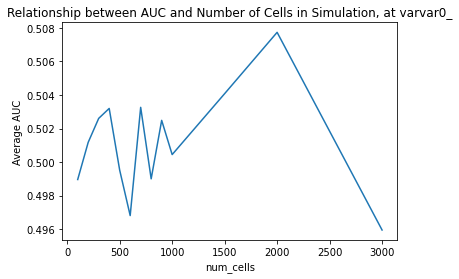

In [167]:
import matplotlib.pyplot as plt
sns.lineplot(data=grouped_avg, x="num_cells", y="value")
plt.xlabel("num_cells")
plt.ylabel("Average AUC")
plt.title(f"Relationship between AUC and Number of Cells in Simulation, at {var}")
# Remove grid (squares) in the background
plt.grid(False)
# Optionally, show the plot
plt.show()